In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as hcluster

## Подготовка данных

Открываем файл с матрицей и смотрим, как он устроен:

In [2]:
DmFile = 'smooth_ruscorp_wa_ppmi_300_norm.dm'

In [3]:
with open (DmFile, 'r', encoding='utf-8') as f_input:
    print (f_input.read(1000))

скользкий_дорога	1.175111190052833	-0.57511714832454974	-0.52588550919746413	0.01331278679499516	-0.45138659636495615	-0.16955272753266831	-0.017347542187076747	-0.098081112217256544	0.066896038669683938	-0.071702445262305139	-0.31794566088461196	-0.08390447332891865	0.0501158346019085	-0.12986212351160525	0.096693477730630251	-0.14674012869984773	0.15961689572246623	0.0063364035797221843	-0.022951386343454866	0.038142135493634474	-0.19316977767403812	0.032502189654112695	-0.077810361217728802	0.19288209186722177	0.026139787881409814	0.14055322394658132	0.15984401445635776	-0.020408885712717977	0.23812118109571134	0.01065209957820689	-0.28378960138895426	-0.062920791541307308	0.0545885616313804	0.054240930933179957	-0.059248276258807506	0.072222107071927777	0.031273104270673348	0.10376186904667969	0.0024569799119113812	-0.033020788597619768	0.03309507848909355	0.063850395570066831	0.033967692491206666	-0.0093818294865688975	0.1561586539123061	-0.02976439273244217	0.027438583497674397	-

Первый элемент каждой строки - словосочетание; далее - значения 300 измерений, разделенные табуляцией.
Превращаем текстовый файл в нужный формат (матрицу чисел):

In [4]:
array = []
with open (DmFile, 'r') as f_input:
    for line in f_input:
        line = line.strip().split('\t')
        vector = []
        for item in line[1:]:
            vector.append(float(item))
        array.append(vector)

In [5]:
X = np.array(array[:13])
print (X.shape)

(13, 300)


## Иерархическая кластеризация

Документация: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

Метод linkage превращает входные данные в иерархическую структуру, которую можно визуализировать с помощью метода dendrogram.

Параметры:

1) входные данные (матрица чисел); <br>
2) алгоритм "связывания" - объединения близких объектов в группы; <br>
3) метод расчета расстояний между объектами (евклидово, косинусное и т.п.).


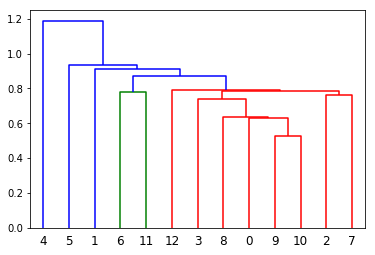

In [6]:
Z = hcluster.linkage(X)
plt.figure()
dn = hcluster.dendrogram(Z)
plt.show()

Метод fcluster превращает дерево в набор кластеров. Итоговый набор зависит от того, на какой ступени иерархической структуры мы остановимся (регулируется параметром t - threshold).

In [8]:
clusters = hcluster.fcluster(Z, 1)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 7


In [9]:
clusters = hcluster.fcluster(Z, 1.2)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 1


In [10]:
clusters = hcluster.fcluster(Z, 0.6)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 10


Метод fclusterdata позволяет объединить два шага (построение дерева и превращение его в "плоский" набор кластеров) в один.

In [11]:
clusters = hcluster.fclusterdata(X, 1)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 7


clusters - массив чисел T, где каждое число - номер кластера для соответствующего элемента (строки) исходной матрицы, т.е. T[i] - номер кластера, приписанный i-тому элементу исходного объекта.

In [12]:
print (clusters)

[2 5 3 2 7 6 1 3 2 2 2 1 4]


## Алгоритм К-средних (KMeans)

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Параметры:

1) число кластеров; <br> 2) метод выбора первых центроидов; <br> 3) количество прогонов всего алгоритма с разными стартовыми центроидами; <br> 4) максимальное число итераций в каждом прогоне и нек. др.

Основные атрибуты:

1) labels_ - возвращает массив из номеров кластеров, приписанных каждому элементу; <br> 2) cluster\_centers\_ - возвращает матрицу с координатами центроидов каждого кластера.

Основные методы:

1) fit - проводит кластеризацию; <br> 2) predict - предсказывает, в какой класс попадет заданный элемент.

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=7).fit(X)
kmeans.labels_

array([5, 0, 4, 1, 3, 6, 2, 4, 1, 1, 1, 2, 5])

In [15]:
kmeans.cluster_centers_

array([[ 1.18068337, -0.04938528, -0.38643569, ..., -0.01838094,
        -0.01314881, -0.01718945],
       [ 1.28430696, -0.70409225, -0.60246917, ..., -0.00399411,
        -0.02104252, -0.03043478],
       [ 1.16614219, -0.08660988, -0.80894133, ..., -0.02018641,
        -0.01399124, -0.02440558],
       ..., 
       [ 1.24640292, -0.60158445, -0.66405982, ..., -0.00444108,
        -0.00531472, -0.0186442 ],
       [ 1.20814158, -0.48667138, -0.49031226, ..., -0.00824784,
        -0.01155794, -0.02264166],
       [ 1.2288421 , -0.27012   , -0.56612072, ..., -0.00579309,
        -0.01098858, -0.02750317]])

In [16]:
sample = array[17:20]
kmeans.predict(sample)

array([4, 1, 4])